In [23]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.quantum_info import Operator
import numpy as np
from qiskit.visualization import plot_histogram
print('done!')

done!


In [24]:
# Oracle for target |1100> in the 4-qubit searching case
oracle_matrix = np.identity(2**4)
oracle_matrix[12, 12] = -1

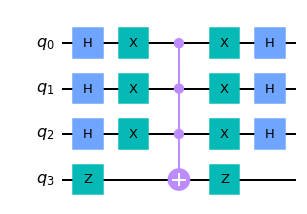

In [25]:
# global diffuser
globaldiffuser = QuantumCircuit(4)
globaldiffuser.h(range(3))
globaldiffuser.x(range(3))  
globaldiffuser.z(3)
globaldiffuser.mct(list(range(3)), 3)  
globaldiffuser.z(3)
globaldiffuser.x(range(3))
globaldiffuser.h(range(3))
globaldiffuser.draw('mpl')

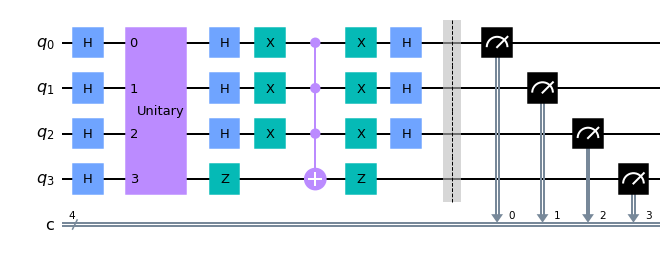

In [26]:
# Performing the 4-qubit Grover quantum search considering the minimum number of iterations   
qc = QuantumCircuit(4,4)
qc.h(range(4))
# applying the oracle operator
qc.unitary(Operator(oracle_matrix), range(4))
# applying the global diffusion operator
qc = qc.compose(globaldiffuser)

qc.barrier()      
qc.measure(range(4),range(4))      

qc.draw('mpl')

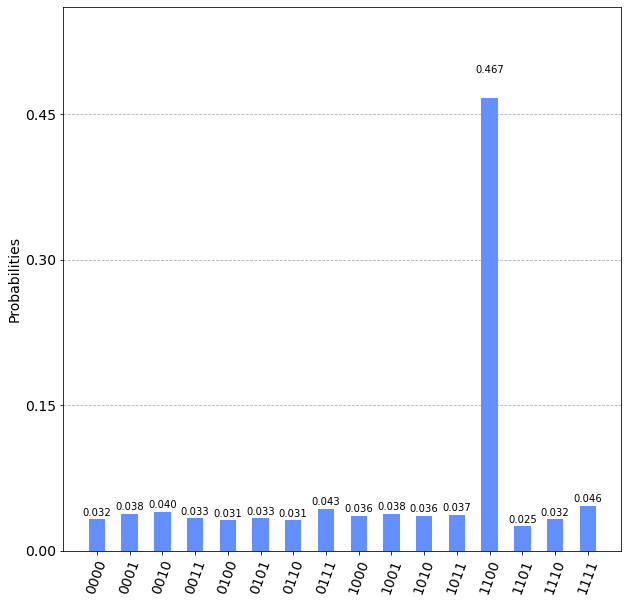

In [27]:
svsim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result()
plot_histogram(result.get_counts(),(10,10))